# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [286]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Density Based Clustering

#### So far we have looked at k-means - a centroid based clustering algorithm and at hierarchical clustering - a conncectivity based clustering algorithm.

In this lesson we will look at *density-based spatial clustering of applications with noise* a.k.a. DBSCAN, which is a density based clustering algorithm. DBSCAN clusters points by how close they are together. Typically we will define a threshold of proximity. Points that are closer than the threshold distance will be grouped together in the same cluster. We call this minimum distance epsilon. There are two things that we adjust in DBSCAN - epsilon and the minimum number of points needed to create a cluster. The main advantage of DBSCAN over k-means is that we do not need to specify the number of clusters in advance, instead we specify epsilon and min points. There are some situations where this clustering technique has an advantage over other techniques. We will examine such scenarios below.

To read more about DBSCAN, click [here](https://en.wikipedia.org/wiki/DBSCAN).

#### We start the example by loading a circle generator from scikit-learn ([documentation](sklearn.datasets.make_circles)) then make an inner circle and an outer circle.

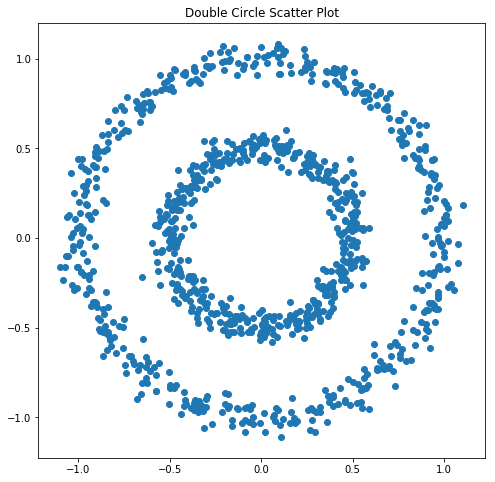

In [287]:
from sklearn import datasets

n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Double Circle Scatter Plot")
plt.show()

#### Clearly finding clusters with k-means in this data will be very hard. Let's demonstrate this below.

We'll initialize a clustering object with 2 clusters, fit the data, and then produce the labels for the k-means clustering.

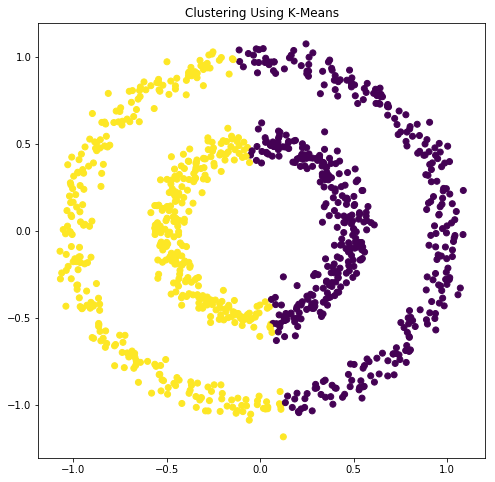

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
circle_kmeans = kmeans.fit(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c = circle_kmeans.labels_)
plt.title("Clustering Using K-Means")
plt.show()

#### In the plot above we see our circle data clustered using k-means. It does not quite capture the true separation in the data. 

However, if we used DBSCAN, we could group our data by density and therefore the inner circle and the outer circle would each be a cluster. We can see this in the cell below by initializing and fitting the DBSCAN model.

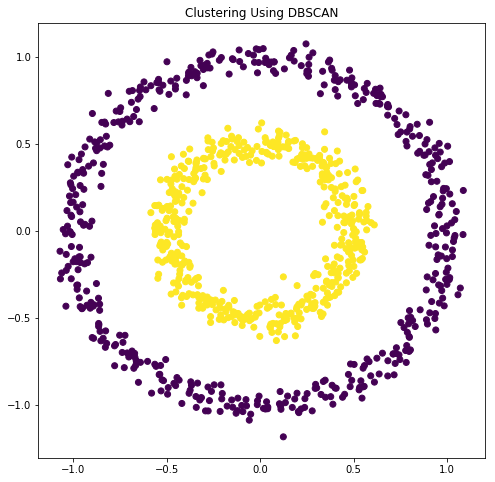

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2)
circle_dbscan = dbscan.fit(X)

plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c = circle_dbscan.labels_)
plt.title("Clustering Using DBSCAN")
plt.show()

#### Neither clustering method can be considered a right or wrong answer. However, each one captures something different in the data and each one has a different purpose.

# Bonus Challenge 1 - Compare K-Means and DBSCAN with Double Moons

Scikit-Learn's `datasets` class has another function called `make_moons` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)) which makes a scatter plot in the shape of two semicircles. Use `make_moons` to make a plot and compare the results of K-Means and DBSCAN algorithm in the same way we showed you for `make_circles`.

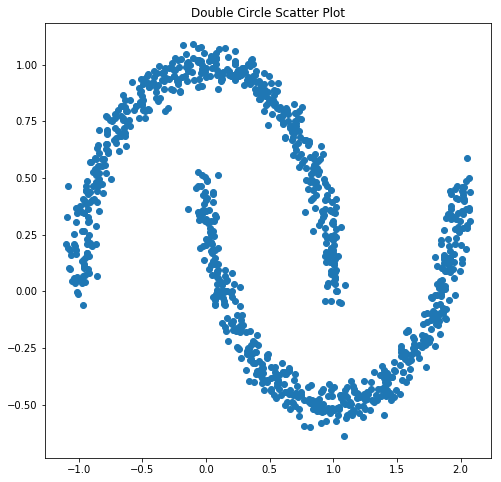

In [18]:
# Your code to make double moons

n_samples = 1000
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.title("Double Circle Scatter Plot")
plt.show()

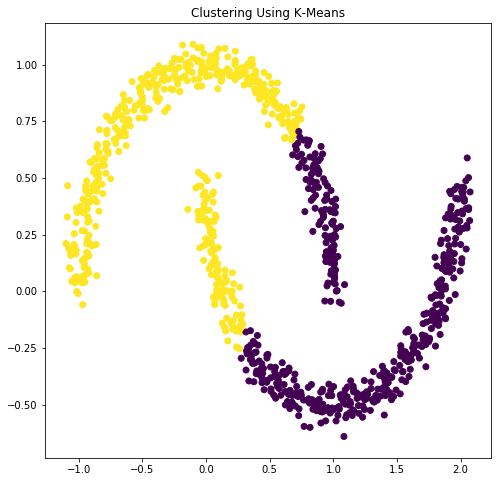

In [19]:
# Your code to visualize how K-Means cluster double-moon scatter plot

kmeans = KMeans(n_clusters=2)
circle_kmeans = kmeans.fit(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c = circle_kmeans.labels_)
plt.title("Clustering Using K-Means")
plt.show()

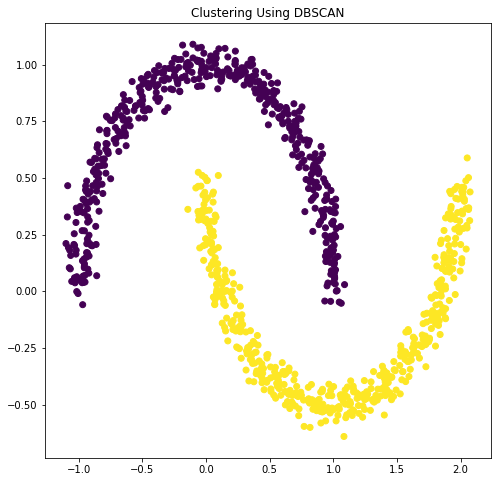

In [20]:
# Your code to visualize how DBSCAN cluster double-moon scatter plot

dbscan = DBSCAN(eps=0.2)
circle_dbscan = dbscan.fit(X)

plt.figure(figsize=(8, 8))

plt.scatter(X[:, 0], X[:, 1], c = circle_dbscan.labels_)
plt.title("Clustering Using DBSCAN")
plt.show()

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [401]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [402]:
#What does each column mean?

    #1) FRESH: annual spending (m.u.) on fresh products (Continuous); 
    #2) MILK: annual spending (m.u.) on milk products (Continuous); 
    #3) GROCERY: annual spending (m.u.)on grocery products (Continuous); 
    #4) FROZEN: annual spending (m.u.)on frozen products (Continuous) 
    #5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
    #6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
    #7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
    #8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

In [403]:
# Your code here:

#Any categorical data to convert? ----> No

customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [404]:
#Any missing data to remove? ----> No

customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

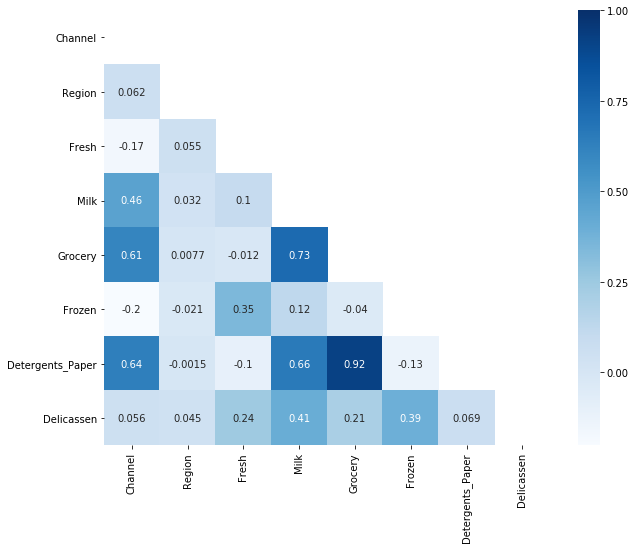

In [405]:
#Column collinearity - any high correlations? ----> Sólo entre Detergents_Paper y Grocery

import seaborn as sns

mask = np.zeros_like(customers.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(customers.corr(), mask=mask, annot=True, cmap="Blues")

In [406]:
#Descriptive statistics - any outliers to remove? ----> Si, como podemos ver la diferencia entre la media y el
#máximo es enorme, por lo que podemos decir que hay outliers.

customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [407]:
#Column-wise data distribution - is the distribution skewed?

from scipy.stats import kurtosis, skew

for i in list(customers.columns.values):
    print('Excess kurtosis of normal distribution (should be 0) for column {}: {}'.format(i, kurtosis(customers[i])))
    print('Excess of normal distribution (should be 0) for column {}: {}'.format(i, skew(customers[i])))

Excess kurtosis of normal distribution (should be 0) for column Channel: -1.4248983835901317
Excess of normal distribution (should be 0) for column Channel: 0.7583545453215589
Excess kurtosis of normal distribution (should be 0) for column Region: -0.1125822676776278
Excess of normal distribution (should be 0) for column Region: -1.279246778599258
Excess kurtosis of normal distribution (should be 0) for column Fresh: 11.392123947034221
Excess of normal distribution (should be 0) for column Fresh: 2.5525826879071585
Excess kurtosis of normal distribution (should be 0) for column Milk: 24.37634877176706
Excess of normal distribution (should be 0) for column Milk: 4.039922122788577
Excess kurtosis of normal distribution (should be 0) for column Grocery: 20.664153228293365
Excess of normal distribution (should be 0) for column Grocery: 3.5751872200807875
Excess kurtosis of normal distribution (should be 0) for column Frozen: 54.05618035816968
Excess of normal distribution (should be 0) for

In [408]:
# Pareto principle: hay  Pareto principle, dado que el ratio sale mayor a 4 (80%/20%), de hecho es alrededor de
#87%/13%.

customers['sales'] = customers.Fresh + customers.Milk + customers.Grocery + customers.Frozen + customers.Detergents_Paper + customers.Delicassen

customers_sort = customers.sort_values(by=['sales'], ascending=False)

top = customers_sort[:int(0.2*len(customers_sort))]
low = customers_sort[int(-0.2*len(customers_sort)):]
top_sales = top['sales'].sum()
low_sales = low['sales'].sum()
print(top_sales/low_sales)

6.783317886731892


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [409]:
# Your code here


In [410]:
# Your comment here

#No quitamos nada, ya que aunque haya dos columnas, Detergents_Paper y Delicassen, con una alta correlación, 
#éstas no tienen mucho que ver.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [411]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()

scaler.fit(customers)
customers_scale = scaler.transform(customers)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/linuxbrew/.linuxbrew/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [412]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
customers_clusters = kmeans.fit(customers_scale)
customers['labels'] = customers_clusters.labels_

Count the values in `labels`.

In [413]:
# Your code here:

customers.labels.value_counts()

1    239
0    128
3     60
2     13
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [414]:
# Your code here

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [415]:
# Your code here

customers.labels_DBSCAN.value_counts()

-1    286
 1    120
 3     16
 2      7
 4      6
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

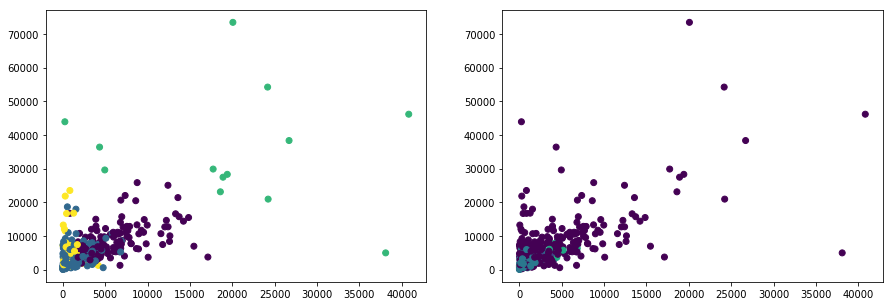

In [416]:
# Your code here:

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(x=customers.Detergents_Paper, y=customers.Milk, c=customers.labels)
ax2.scatter(x=customers.Detergents_Paper, y=customers.Milk, c=customers.labels_DBSCAN)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

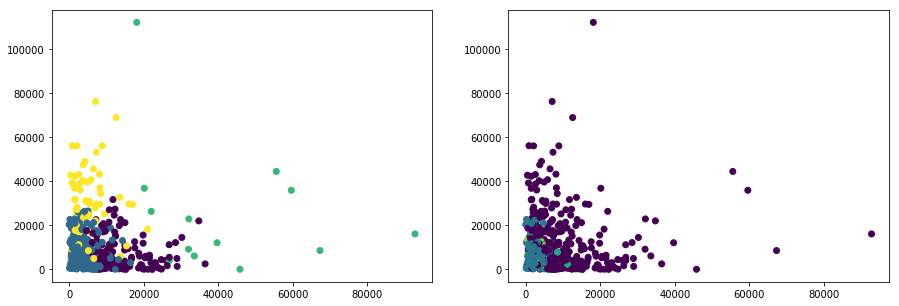

In [417]:
# Your code here:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(x=customers.Grocery, y=customers.Fresh, c=customers.labels)
ax2.scatter(x=customers.Grocery, y=customers.Fresh, c=customers.labels_DBSCAN)

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

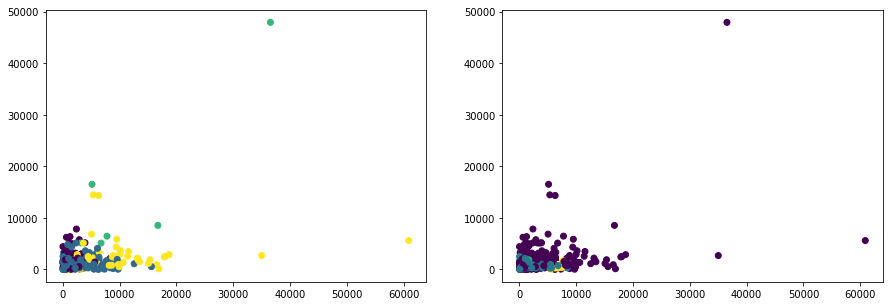

In [418]:
# Your code here:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.labels)
ax2.scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.labels_DBSCAN)

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [419]:
# Your code here:

customers.groupby('labels', as_index=False).mean()

,labels,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,sales,labels_DBSCAN
0,0,2.000000,2.617188,7665.382812,8823.804688,14038.148438,1449.343750,6060.460938,1531.546875,39568.687500,-0.796875
1,1,1.000000,2.472803,8721.794979,2798.523013,3443.949791,2357.920502,805.389121,952.635983,19080.213389,0.397490
2,2,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,137500.769231,-1.000000
3,3,1.050000,2.650000,31323.883333,4916.300000,5547.816667,8560.200000,689.233333,2413.016667,53450.450000,-1.000000


In [420]:
customers.groupby('labels_DBSCAN', as_index=False).mean()

,labels_DBSCAN,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,sales,labels
0,-1,1.454545,2.451049,14180.041958,7773.297203,10675.541958,3688.674825,4023.667832,1947.555944,42288.779720,1.059441
1,0,2.000000,3.000000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,26205.600000,0.000000
2,1,1.000000,3.000000,8118.158333,1854.283333,2404.358333,1874.941667,493.258333,718.933333,15463.933333,1.000000
3,2,2.000000,3.000000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,27015.000000,0.000000
4,3,1.000000,1.000000,8190.000000,2041.875000,2279.250000,1278.437500,315.250000,619.500000,14724.312500,1.000000
5,4,1.000000,1.000000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,18919.166667,1.000000


Which algorithm appears to perform better?

In [421]:
# Your observations here

#Aparentemente, el modelo K-means trabaja para este caso mejor, dado que ha sido capaz de distinguir mejor entre
#los diferentes grupos de puntos.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [422]:
# Your code here

kmeans = KMeans(n_clusters=3)
customers_clusters = kmeans.fit(customers_scale)
customers['labels'] = customers_clusters.labels_

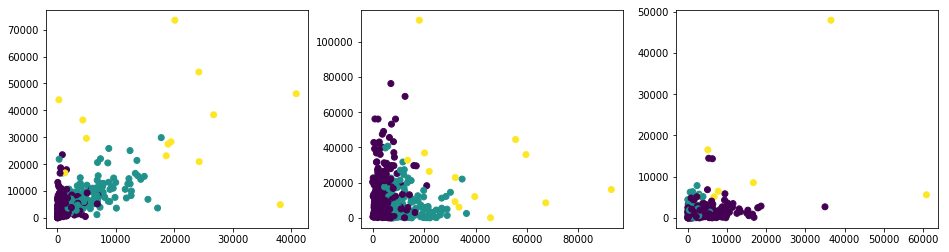

In [423]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

ax1.scatter(x=customers.Detergents_Paper, y=customers.Milk, c=customers.labels)
ax2.scatter(x=customers.Grocery, y=customers.Fresh, c=customers.labels)
ax3.scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.labels)

In [424]:
# Your comment here

#Parece que el número optimo de clusters es 3, dado que es el que mejor distingue sin superponer poblaciones.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [425]:
# Your code here

dbscan = DBSCAN(eps=0.6, min_samples=15).fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_

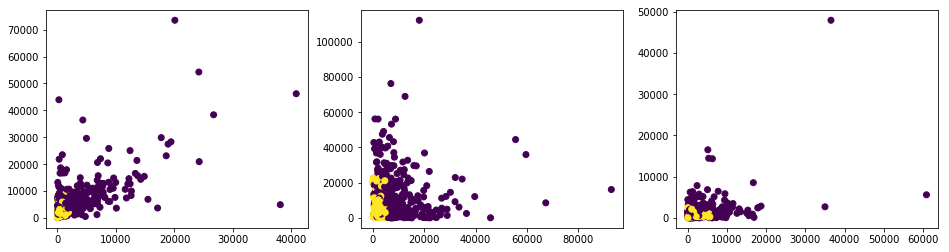

In [426]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

ax1.scatter(x=customers.Detergents_Paper, y=customers.Milk, c=customers.labels_DBSCAN)
ax2.scatter(x=customers.Grocery, y=customers.Fresh, c=customers.labels_DBSCAN)
ax3.scatter(x=customers.Frozen, y=customers.Delicassen, c=customers.labels_DBSCAN)

In [427]:
# Your comment here